In [1]:
import os
from google.cloud import bigquery
import pandas as pd

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/Rebecca/.config/gcloud/application_default_credentials.json"
%load_ext google.cloud.bigquery
client = bigquery.Client()

print('Done!')

Done!


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Data Import: Combined_broadband_deployment_rate_and_demographic_info

In [3]:
%%bigquery data
SELECT *
FROM `broadband-data.CountyInfo.Highspeed_broadband_demo_table`

Downloading: 100%|██████████████████████| 3019/3019 [00:01<00:00, 1605.23rows/s]


In [4]:
data.head()

,broadband_rate,Countycode,Population_density,Age_under_17_ratio,Age_between_18_and_24_ratio,Age_above_65_ratio,County_median_income,House_owner_ratio,One_person_households_ratio,Householder_65_years_and_over_ratio,rural_population_ratio,Above_high_school_population_ratio,male_ratio,unemployment_ratio,housing_density,winter_avg_temp,latitude,longitude
0,0.930392,48463,17.014627,0.289074,0.097633,0.147548,49275.0,0.722,0.199,0.255,0.313842,0.762318,0.347321,0.090,6.966299,55.3,29.350308,-99.768427
1,0.821122,35045,23.587753,0.289525,0.097875,0.108294,44261.0,0.754,0.193,0.176,0.336640,1.016894,0.473570,0.090,8.949612,35.4,36.511624,-108.324578
2,0.959781,48497,65.384275,0.260507,0.083092,0.123108,71636.0,0.814,0.183,0.188,0.721075,1.184366,0.498334,0.087,26.297689,47.6,33.219095,-97.653997
3,0.854247,30067,5.578309,0.197365,0.050844,0.165579,56657.0,0.664,0.324,0.234,0.475249,1.008122,0.397480,0.087,3.344631,23.8,45.463081,-110.534930
4,0.943731,27071,4.288199,0.209000,0.067989,0.195628,56870.0,0.804,0.304,0.287,0.469987,0.745774,0.355571,0.087,2.545021,17.5,48.245374,-93.782896


In [5]:
data.columns

Index(['broadband_rate', 'Countycode', 'Population_density',
       'Age_under_17_ratio', 'Age_between_18_and_24_ratio',
       'Age_above_65_ratio', 'County_median_income', 'House_owner_ratio',
       'One_person_households_ratio', 'Householder_65_years_and_over_ratio',
       'rural_population_ratio', 'Above_high_school_population_ratio',
       'male_ratio', 'unemployment_ratio', 'housing_density',
       'winter_avg_temp', 'latitude', 'longitude'],
      dtype='object')

data['Gender ratio difference'] = data['Male_ratio']-data['Female_ratio']

In [6]:
print(len(data))
print(data.Countycode.nunique())


3019
3016


In [7]:
#Normalize 
cols_to_norm = ['broadband_rate',  'Population_density',
       'Age_under_17_ratio', 'Age_between_18_and_24_ratio',
       'Age_above_65_ratio', 'County_median_income', 'House_owner_ratio',
       'One_person_households_ratio', 'Householder_65_years_and_over_ratio',
       'rural_population_ratio', 'Above_high_school_population_ratio',
       'male_ratio', 'unemployment_ratio', 'housing_density',
       'winter_avg_temp', 'latitude', 'longitude']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))


###  State Level

#### 1. Summary

data_state = data.groupby("State_name").mean()
data_state = data_state.sort_values('Broadband_Deployment_rate',ascending=False)
data_state = data_state.reset_index()

data_state.head()

The top five states with highest deployment rate are South Dakota, Rhode Island, Kansas, North Dakota, and Minnesota.

data_state = data.groupby("State_name").mean()
data_state = data_state.sort_values('Broadband_Deployment_rate')
data_state = data_state.reset_index()
data_state2 = data_state.drop(['State_name'],axis=1)
data_state.head()

The top five states with lowest deployment rate are Nevada, New Mexico, Louisiana, Mississippi, and West Virginia

#### 2. Correlation

plt.figure(figsize=(20,20))
sns.heatmap(data_state2.corr(),cmap="Blues",annot=True)
plt.title("Correlation matrix of State Level", fontdict = {'fontsize' : 18})
plt.show()

data_state2.corr().iloc[0].sort_values(ascending=False)[:11]

From corelation table, the 10 most corelated to deloyment rate features are Insurance_equal_1_ratio, Female_ratio, Race_white_ratio, Age_above_65_ratio, Degree_college_ratio, Degree_college_ratio, Rural_density, Population_density, Urban_density, Urban_ratio, and Race_asian_ratio.

fig,ax = plt.subplots(2,2,figsize=(10,10))
fig.suptitle("Correlation with Deployment Rate")
ax[0,0].scatter(data_state2['Insurance_equal_1_ratio'],data_state2['Broadband_Deployment_rate'])
ax[0,0].set_xlabel("Insurance_equal_1_ratio")
ax[0,0].set_ylabel("Broadband Deployment Rate")

ax[0,1].scatter(data_state2['Female_ratio'],data_state2['Broadband_Deployment_rate'])
ax[0,1].set_xlabel("Female_ratio")
ax[0,1].set_ylabel("Broadband Deployment Rate")

ax[1,0].scatter(data_state2['Race_white_ratio'],data_state2['Broadband_Deployment_rate'])
ax[1,0].set_xlabel("Race_white_ratio")
ax[1,0].set_ylabel("Broadband Deployment Rate")

ax[1,1].scatter(data_state2['Age_above_65_ratio'],data_state2['Broadband_Deployment_rate'])
ax[1,1].set_xlabel("Age_above_65_ratio")
ax[1,1].set_ylabel("Broadband Deployment Rate")

#ax5.scatter(data_state2['Degree_college_ratio'],data_state2['Broadband_Deployment_rate'])
#ax5.set_xlabel("Degree_college_ratio")
#ax5.set_ylabel("Broadband Deployment Rate")

#### 3. Regression

lr = LinearRegression()
X = data_state2.drop(['Broadband_Deployment_rate'],axis=1)
y = data_state2['Broadband_Deployment_rate']
lr.fit(X,y)

coef = pd.DataFrame({"Feature": X.columns, "Coefficients":lr.coef_})
coef = coef.sort_values("Coefficients",ascending=False)
coef

### County Level

#### 1. Summary

In [13]:

data_county = data.sort_values('broadband_rate',ascending=False)
#data_county = data_county.reset_index()

In [14]:
data_county.head()

,broadband_rate,Countycode,Population_density,Age_under_17_ratio,Age_between_18_and_24_ratio,Age_above_65_ratio,County_median_income,House_owner_ratio,One_person_households_ratio,Householder_65_years_and_over_ratio,rural_population_ratio,Above_high_school_population_ratio,male_ratio,unemployment_ratio,housing_density,winter_avg_temp,latitude,longitude
3018,0.372841,21011,-0.135231,0.393314,-0.398403,-0.310785,-1.053881,0.514900,0.200316,0.080222,1.324821,0.562106,0.129175,1.790447,-0.122270,-0.042623,-0.029217,0.664554
1573,0.372841,13055,-0.108912,-0.287661,-0.068082,-0.336971,-0.873076,0.266804,0.185436,0.270614,-0.029021,-0.534825,-0.131686,0.818470,-0.101424,0.906051,-0.781142,0.519853
1567,0.372841,42075,0.072468,-0.128717,-0.122302,0.249021,0.451816,0.123460,0.185436,0.194457,-1.018010,0.633270,0.064012,-0.671895,0.056366,-0.289278,0.424465,1.319168
1568,0.372841,23023,-0.073276,-0.746551,-0.637521,0.098760,0.784867,0.090381,0.185436,-0.490953,0.102278,0.092585,-0.789128,-0.769093,-0.052024,-0.972323,1.149267,1.915076
1569,0.372841,13293,-0.108324,0.056163,-0.034417,-0.081577,-0.608594,-0.036423,0.185436,0.181764,-0.368777,-0.249304,-0.523130,1.012865,-0.098003,1.209626,-1.106672,0.614632


data_county = data.groupby("County_name").mean()
data_county = data_county.sort_values('Broadband_Deployment_rate')
data_county = data_county.reset_index()
data_county.head()

#### 2. Correlation

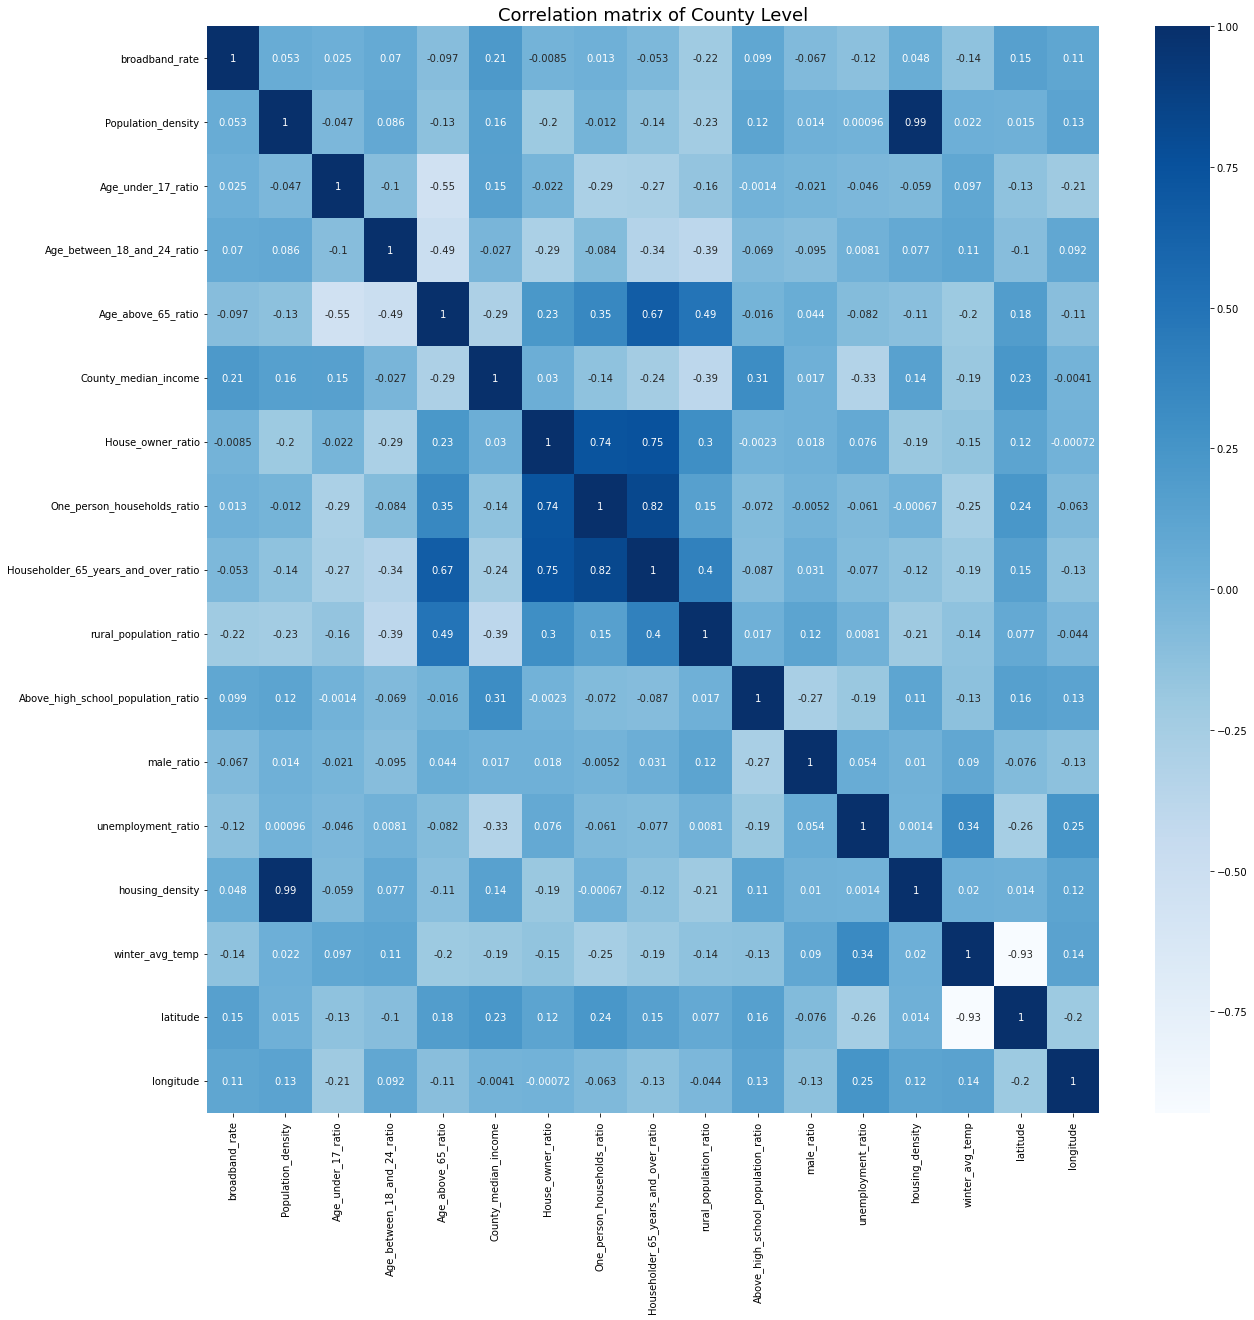

In [15]:
data_county2 = data_county.drop(['Countycode'],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(data_county2.corr(),cmap="Blues",annot=True)
plt.title("Correlation matrix of County Level", fontdict = {'fontsize' : 18})
plt.show()

In [16]:
data_county2.corr().iloc[0].sort_values(ascending=False)[:11]

broadband_rate                        1.000000
County_median_income                  0.212191
latitude                              0.147738
longitude                             0.107846
Above_high_school_population_ratio    0.098528
Age_between_18_and_24_ratio           0.069855
Population_density                    0.052901
housing_density                       0.047985
Age_under_17_ratio                    0.024920
One_person_households_ratio           0.012571
House_owner_ratio                    -0.008450
Name: broadband_rate, dtype: float64

Text(0, 0.5, 'Broadband Deployment Rate')

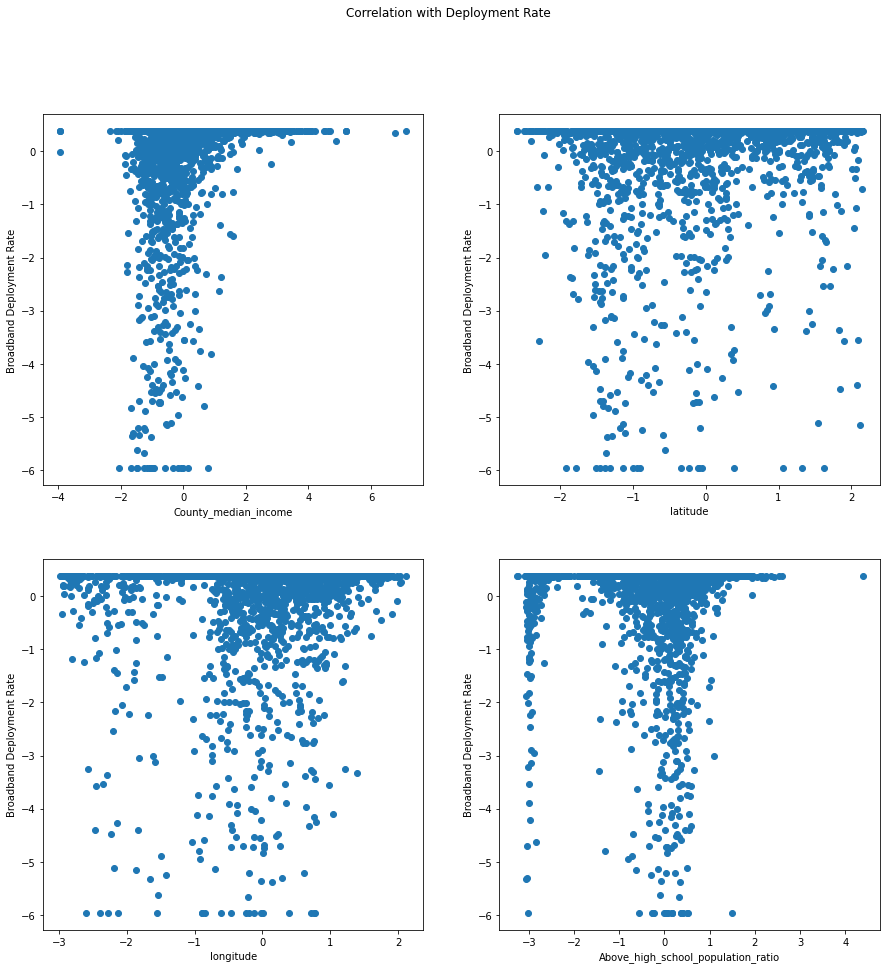

In [17]:
fig,ax = plt.subplots(2,2,figsize=(15,15))
fig.suptitle("Correlation with Deployment Rate")
ax[0,0].scatter(data_county2['County_median_income'],data_county2['broadband_rate'])
ax[0,0].set_xlabel("County_median_income")
ax[0,0].set_ylabel("Broadband Deployment Rate")

ax[0,1].scatter(data_county2['latitude'],data_county2['broadband_rate'])
ax[0,1].set_xlabel("latitude")
ax[0,1].set_ylabel("Broadband Deployment Rate")

ax[1,0].scatter(data_county2['longitude'],data_county2['broadband_rate'])
ax[1,0].set_xlabel("longitude")
ax[1,0].set_ylabel("Broadband Deployment Rate")

ax[1,1].scatter(data_county2['Above_high_school_population_ratio'],data_county2['broadband_rate'])
ax[1,1].set_xlabel("Above_high_school_population_ratio")
ax[1,1].set_ylabel("Broadband Deployment Rate")

#### 4. Regression

In [18]:
lr = LinearRegression()
X = data_county2.drop(['broadband_rate'],axis=1)
y = data_county2['broadband_rate']
lr.fit(X,y)

LinearRegression()

In [19]:
coef = pd.DataFrame({"Feature": X.columns, "Coefficients":lr.coef_})
coef = coef.sort_values("Coefficients",ascending=False)
coef

,Feature,Coefficients
14,latitude,0.219707
15,longitude,0.180603
12,housing_density,0.125992
7,Householder_65_years_and_over_ratio,0.079787
4,County_median_income,0.068286
1,Age_under_17_ratio,0.062788
13,winter_avg_temp,0.062507
2,Age_between_18_and_24_ratio,0.031494
9,Above_high_school_population_ratio,0.025729
3,Age_above_65_ratio,0.010761
